**Fundamentals of Solar Cells and Photovoltaic Systems Engineering**

**Solutions Manual - Chapter 15**

**Problem 15.9**


**Consider now the EQE of the triple-junction solar cell at EOL and the degraded coverglass transmittance (tabulated data is provided in the online repository of this book). Quantify the current loss in each subcell with respect to the results in Problem 15.8. Which is the subcell that has decreased its current the most?  What is the current balance in this case?**

We will use the package [pandas](https://pandas.pydata.org/) to handle the data and [matplotlib.pyplot](https://matplotlib.org/stable/index.html) to plot the results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We start by importing the data for the solar spectra.

In [2]:
datafile = pd.read_csv('data/Reference_spectrum_ASTM-G173-03.csv', index_col=0, header=0) 
datafile

,AM0,AM1.5G,AM1.5D
Wvlgth nm,Etr W*m-2*nm-1,Global tilt W*m-2*nm-1,Direct+circumsolar W*m-2*nm-1
280,8.20E-02,4.73E-23,2.54E-26
280.5,9.90E-02,1.23E-21,1.09E-24
281,1.50E-01,5.69E-21,6.13E-24
281.5,2.12E-01,1.57E-19,2.75E-22
...,...,...,...
3980,8.84E-03,7.39E-03,7.40E-03
3985,8.80E-03,7.43E-03,7.45E-03
3990,8.78E-03,7.37E-03,7.39E-03
3995,8.70E-03,7.21E-03,7.23E-03


In [3]:
datafile.drop(datafile.index[0], inplace=True)   #remove row including information on units
datafile=datafile.astype(float)                  #convert values to float for easy operation
datafile.index=datafile.index.astype(float)      #convert indexes to float for easy operation

We can also plot the three spectra

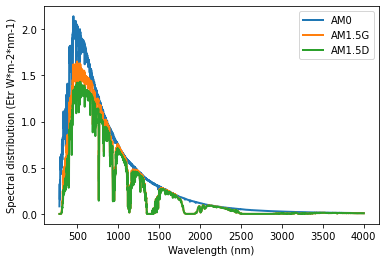

In [4]:
plt.plot(datafile, 
         linewidth=2, label=datafile.columns)
plt.ylabel('Spectral distribution (Etr W*m-2*nm-1)')
plt.xlabel('Wavelength (nm)')
plt.legend()

We define the relevant constants and import the QE of the triple junction solar cell at EOL.

In [5]:
h=6.63*10**(-34)   # [J·s] Planck constant
e=1.60*10**(-19)   # [C] electron charge
c =299792458       #[m/s] Light speed

In [6]:
QE_top = pd.read_csv('data/EQE_TC_EOL.txt', 
                     header=None, index_col=0, sep='\t').dropna().squeeze() #import dataframe and convert into series
QE_mid = pd.read_csv('data/EQE_MC_EOL.txt', 
                     header=None, index_col=0, sep='\t').squeeze() #import dataframe and convert into series 
QE_bot = pd.read_csv('data/EQE_BC_EOL.txt', 
                     header=None, index_col=0, sep='\t').squeeze() #import dataframe and convert into series 

We can plot the Quantum Efficiency.

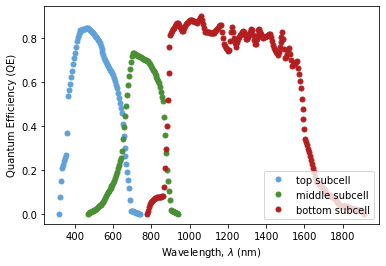

In [7]:
plt.plot(QE_top, linewidth=0, label='top subcell', marker='.', markersize=10, color='#5FA1D8') #ligthblue
plt.plot(QE_mid, linewidth=0, label='middle subcell', marker='.', markersize=10, color='#498F34') #green
plt.plot(QE_bot, linewidth=0, label='bottom subcell', marker='.', markersize=10, color='#B31F20') #darkred
plt.ylabel('Quantum Efficiency (QE)')
plt.xlabel('Wavelength, $\lambda$ (nm)');
plt.legend(loc='lower right')

We import the transmisttance of the coverglass at the BOL and the degradation and plot both.

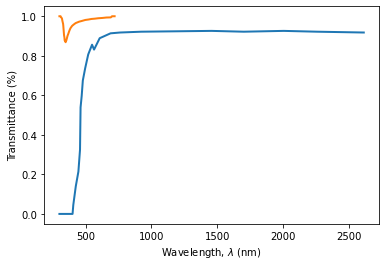

In [10]:
T_coverglass = pd.read_csv('data/TransmissionCoverGlass_BOL.txt', 
                     header=None, index_col=0, sep='\t').squeeze() #import dataframe and convert into serie
T_losses = pd.read_csv('data/T_losses_EOL.txt', 
                     header=None, index_col=0, sep='\t').squeeze() #import dataframe and convert into serie
plt.plot(T_coverglass, linewidth=2)
plt.plot(T_losses, linewidth=2)
plt.ylabel('Transmittance (%)')
plt.xlabel('Wavelength, $\lambda$ (nm)');

For the top subcell, we calculate the spectral response, interpolate the spectrum, and integrate to obtain the short-circuit current density.

$J=\int SR(\lambda) \cdot G(\lambda) \cdot T_{coverglass}(\lambda) T_{losses}(\lambda) \ d\lambda$

In this case, we assume the extraterrestrial irradiance AM0 and multiply it by the transmittance of the coverglass and the transmittance losses.

In [11]:
QE=QE_top
SR=pd.Series(index=QE.index,
            data=[QE.loc[i]*e*i*0.000000001/(h*c) for i in QE.index])

spectrum='AM0'
spectra=datafile[spectrum]
spectra_interpolated=np.interp(SR.index, spectra.index, spectra.values)
T_coverglass_interpolated=np.interp(SR.index, T_coverglass.index, T_coverglass.values)
T_losses_interpolated=np.interp(SR.index, T_losses.index, T_losses.values)
J_top = np.trapz([x*y*z*w for x,y,z,w in zip(SR, spectra_interpolated,T_coverglass_interpolated, T_losses_interpolated)], x=SR.index)*1000/10000 # A-> mA ; m2 -> cm2
print('Photocurrent density top = ' + str(J_top.round(1)) + ' mA/cm2')

Photocurrent density top = 9.8 mA/cm2


We repeat the analysis for the middle subcell.

In [12]:
QE=QE_mid
SR=pd.Series(index=QE.index,
            data=[QE.loc[i]*e*i*0.000000001/(h*c) for i in QE.index])

spectra=datafile[spectrum]
spectra_interpolated=np.interp(SR.index, spectra.index, spectra.values)
T_coverglass_interpolated=np.interp(SR.index, T_coverglass.index, T_coverglass.values)
T_losses_interpolated=np.interp(SR.index, T_losses.index, T_losses.values)
J_mid = np.trapz([x*y*z*w for x,y,z,w in zip(SR, spectra_interpolated,T_coverglass_interpolated, T_losses_interpolated)], x=SR.index)*1000/10000 # A-> mA ; m2 -> cm2
print('Photocurrent density middle = ' + str(J_mid.round(1)) + ' mA/cm2')

Photocurrent density middle = 11.3 mA/cm2


We repeat the analysis for the bottom subcell.

In [13]:
QE=QE_bot
SR=pd.Series(index=QE.index,
            data=[QE.loc[i]*e*i*0.000000001/(h*c) for i in QE.index])

spectra=datafile[spectrum]
spectra_interpolated=np.interp(SR.index, spectra.index, spectra.values)
T_coverglass_interpolated=np.interp(SR.index, T_coverglass.index, T_coverglass.values)
T_losses_interpolated=np.interp(SR.index, T_losses.index, T_losses.values)
J_bot = np.trapz([x*y*z*w for x,y,z,w in zip(SR, spectra_interpolated,T_coverglass_interpolated, T_losses_interpolated)], x=SR.index)*1000/10000 # A-> mA ; m2 -> cm2

print('Photocurrent density bottom = ' + str(J_bot.round(1)) + ' mA/cm2')

Photocurrent density bottom = 26.6 mA/cm2


The current balance of the top and middle subcells ($J_{SC,top}$/$J_{SC,middle}$) can be calculated as follows:

In [14]:
J_top/J_mid

0.866321643567946

Comparing with the short-circuit current produced at the BOL (Problem 15.8), the middle subcell is the subcell which has degraded the most with a 69% of remaining photogenerated current density versus 94% and 98% for the top and bottom subcells respectively, even though the coverglass degradation occurs in the UV region.

In [15]:
J_top/10.5

0.935750433578811

In [16]:
J_mid/16.5

0.6873631209172923

In [17]:
J_bot/27.4

0.9690000719194425